<a href="https://colab.research.google.com/github/szalontai/PUC_Rio_MVP_sprint_04/blob/develop/MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Engenharia de Sistemas de Software Inteligentes - Profs. Marcos Kalinowski e Tatiana Escovedo
## Aula 02: Prática de Machine Learning em Python

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## Montagem  POO

In [ ]:
class Carregador:

    def carregar_dados(self, url: str, atributos: list=[]):
        """ Carrega e retorna um DataFrame. Há diversos parâmetros
        no read_csv que poderiam ser utilizados para dar opções
        adicionais.
        """
        return pd.read_csv(url, names=atributos)

    def carregar_dados_2(self, url: str):
        """ Carrega e retorna um DataFrame. Há diversos parâmetros
        no read_csv que poderiam ser utilizados para dar opções
        adicionais.
        """
        return pd.read_csv(url,delimiter=',')



class PreProcessador:

    def pre_processar(self, dataset, percentual_teste, seed=7):
        """ Cuida de todo o pré-processamento. """
        # limpeza dos dados e eliminação de outliers

        # feature selection

        # divisão em treino e teste
        X_train, X_test, Y_train, Y_test = self.__preparar_holdout(dataset,
                                                                  percentual_teste,
                                                                  seed)
        # normalização/padronização

        return (X_train, X_test, Y_train, Y_test)

    def __preparar_holdout(self, dataset, percentual_teste, seed):
        """ Divide os dados em treino e teste usando o método holdout.
        Assume que a variável target está na última coluna.
        O parâmetro test_size é o percentual de dados de teste.
        """
        dados = dataset.values
        X = dados[:, 0:-1]
        Y = dados[:, -1]
        return train_test_split(X, Y, test_size=percentual_teste, random_state=seed)


class Modelo:

    def treinar_SVM(self, X_train, Y_train):
        """ Cria e treina um modelo SVM. Poderia ter um Grid Search
        com cross_validation para escolher os melhores hiperparâmetros, etc.
        """
        modelo = SVC()
        modelo.fit(X_train, Y_train)
        return modelo


class Avaliador:

    def avaliar_acuracia(self, modelo, X_test, Y_test):
        """ Faz uma predição e avalia o modelo. Poderia parametrizar o tipo de
        avaliação, entre outros.
        """
        predicoes = modelo.predict(X_test)
        return accuracy_score(Y_test, predicoes)


# Este código começaria daqui, logo após os imports
# from carregador import Carregadpr
# from preprocessador import PreProcessador
# from modelo import Modelo
# from avaliador import Avaliador

# Instanciação das Classes
carregador = Carregador()
pre_processador = PreProcessador()
modelo = Modelo()
avaliador = Avaliador()

# Parâmetros
url_dados = ('https://raw.githubusercontent.com/szalontai/PUC_Rio_MVP_sprint_04/develop/final_test.csv')
atributos = ['vazio','weight', 'age','height', 'size']
percentual_teste = 0.2

# Código

# Carga
dataset = carregador.carregar_dados_2(url_dados)

ds = dataset[["weight","age","height","size"]]

ds.tail()

df = ds.dropna(how='any')
df.tail()


# Pré-processamento
##X_train, X_test, Y_train, Y_test = pre_processador.pre_processar(df, percentual_teste)
# Treinamento do modelo
##model = modelo.treinar_SVM(X_train, Y_train)
# Impressão do resultado da avaliação
##print(avaliador.avaliar_acuracia(model, X_test, Y_test))

,weight,age,height,size
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL
119733,70,30.0,167.64,XL


## Carga do Dataset

In [ ]:

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/szalontai/PUC_Rio_MVP_sprint_04/develop/final_test.csv"

dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()


,Unnamed: 0,weight,age,height,size
0,0,62,28.0,172.72,XL
1,1,59,36.0,167.64,L
2,2,61,34.0,165.10,M
3,3,65,27.0,175.26,L
4,4,62,45.0,172.72,M


In [ ]:
ds = dataset[["weight","age","height","size"]]
ds

#ds.count()

#ds.groupby('size').mean()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


Teste de gráficos

## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = df.values
X = array[:,0:3]
y = array[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.475315 (0.002384)
CART: 0.502539 (0.003018)
NB: 0.479595 (0.003293)
SVM: 0.511823 (0.004562)


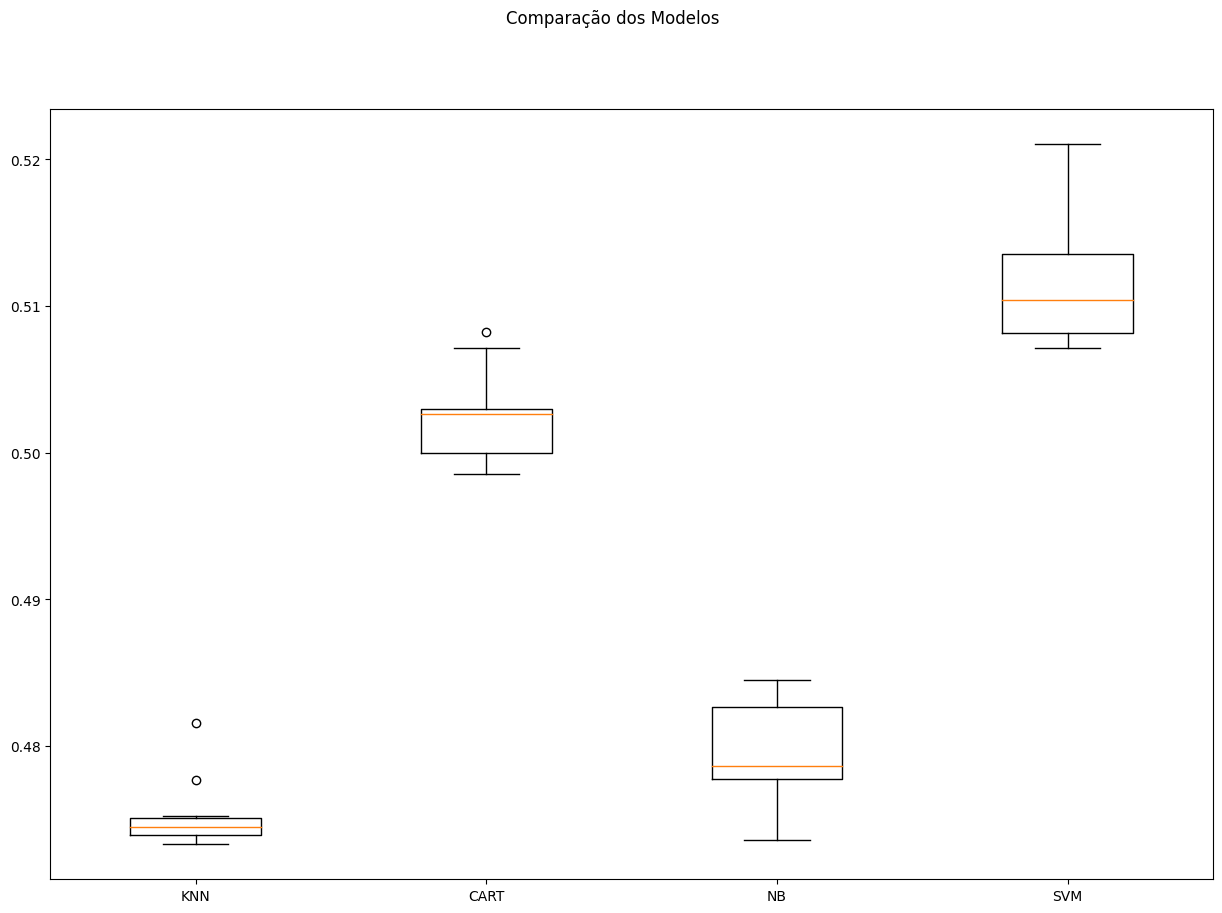

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

KNN-orig: 0.475 (0.002)
CART-orig: 0.503 (0.003)
NB-orig: 0.480 (0.003)
SVM-orig: 0.512 (0.005)
KNN-padr: 0.475 (0.005)
CART-padr: 0.503 (0.003)
NB-padr: 0.480 (0.003)


### Otimização dos hiperparâmetros

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

## Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=17)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.7402597402597403


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=17)

## Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe!
data = {'preg':  [1, 9, 5],
        'plas': [90, 100, 110],
        'pres': [50, 60, 50],
        'skin': [30, 30, 30],
        'test': [100, 100, 100],
        'mass': [20.0, 30.0, 40.0],
        'pedi': [1.0, 2.0, 1.0],
        'age': [15, 40, 40],
        }

atributos = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-0.84488505 -0.96691063 -0.98770975  0.59362962  0.17539902 -1.52208897
   1.59499624 -1.55207596]
 [ 1.53084665 -0.65393918 -0.47073225  0.59362962  0.17539902 -0.25289651
   4.61511492  0.57511787]
 [ 0.3429808  -0.34096773 -0.98770975  0.59362962  0.17539902  1.01629594
   1.59499624  0.57511787]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0. 1. 0.]
